In [65]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [66]:
baza=pd.read_csv("Netflix_all.csv")

In [67]:
najboljpopularni=baza.sort_values(by=['averageRating'] , ascending=False).head(1000)
razmerje=najboljpopularni["type"].value_counts()


In [68]:
df=DataFrame([razmerje[0],razmerje[1]],columns=["type"],index=['Movie',"TV Show"])

Razmerje filmov in TV shows v našem datafrejmu.

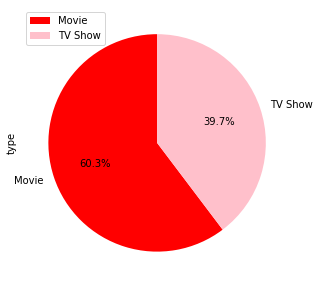

In [69]:
df.plot.pie(subplots=True , figsize=(5,5),autopct='%1.1f%%', startangle=90, colors = ['red', 'pink'])
plt.show()

In [70]:
slovar={}
for kr in baza['country']:
    if(kr!="0"):
        split=kr.split(", ")
        for s in split:
            if s not in slovar:
                slovar[s]=1
            else:
                num=slovar[s]
                slovar[s]=num+1

In [71]:
df=pd.DataFrame(list(slovar.items()), columns=["country","num"])
df=df.sort_values("num",ascending=False)
df

,country,num
0,United States,2609
1,India,838
4,United Kingdom,601
7,Canada,318
13,France,271
...,...,...
83,Kenya,1
84,Sudan,1
85,Sri Lanka,1
87,Panama,1


Število narejeniv filmov v posamezni državi.

In [72]:
#df[df["num"]>10].plot(y="num", kind='barh',figsize=(30,15))
import plotly.express as px
fig = px.bar(df.head(20), x='country', y='num')
fig.show()

In [73]:
slovar={}
stevec=0
splitano=""
skip=0
for jak,avg in baza[["director","averageRating"]].iterrows():
    for name in avg:
        if(name!="-1"):
            if(skip!=1):
                if(stevec==0):
                    splitano=name.split(",")
                    for na in splitano:
                        if na not in slovar:
                            slovar[na]=[]
                    stevec+=1
                else:
                    for na in splitano:
                        seznam=slovar[na]
                        seznam.append(name)
                        slovar[na]=seznam
                    stevec=0
            else:
                skip=0
        else:
            skip=1

In [74]:
def Average(lst): 
    return sum(lst) / len(lst)

In [75]:
drugislovar={}
for key in slovar.keys():
        seznam=slovar[key]
        if -1.0 in seznam:
            seznam.remove(-1.0)
        if(len(seznam)>2):
            if Average(seznam)>0:
                drugislovar[key]=Average(seznam)

In [76]:
import matplotlib.pyplot as plt

In [77]:
drugislovar={k: v for k, v in sorted(drugislovar.items(), key=lambda item: item[1])}

In [78]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [79]:
prvih20={}
stevec=0
zadnjih20={}
for key in drugislovar.keys():
    stevec+=1
    if len(drugislovar)-stevec<=5:
        zadnjih20[key]=drugislovar[key]
stevec=0
for key in drugislovar.keys():
    stevec+=1
    if stevec<=5:
        prvih20[key]=drugislovar[key]

In [80]:
stevec=0
splitano=""
skip=0
slovardrzave={}
for jak,avg in baza[["director","country",]].iterrows():
     for name in avg:
        if(name!="-1"):
            if(skip!=1):
                if(stevec==0):
                    splitano=name.split(",")
                    for na in splitano:
                        if na not in slovardrzave:
                            slovardrzave[na]=[]
                    stevec+=1
                else:
                    for na in splitano:
                        seznam=slovardrzave[na]
                        for co in name.split(","):
                            if co!="":
                                if co not in seznam and co!="0":
                                    if co[0]==" ":
                                        co=co[1:]
                                    seznam.append(co)
                                slovardrzave[na]=seznam
                    stevec=0
            else:
                skip=0
        else:
            skip=1

In [81]:
usa={}
fra={}
uk={}
som={}
aze={}
for director in drugislovar.keys():
    if "Germany" in slovardrzave[director]:
        if director not in aze.keys():
            aze[director]=drugislovar[director]
    if "India" in slovardrzave[director]:
        if director not in som.keys():
            som[director]=drugislovar[director]
    if "United Kingdom" in slovardrzave[director]:
        if director not in uk.keys():
            uk[director]=drugislovar[director]
    if "France" in slovardrzave[director]:
        if director not in fra.keys():
            fra[director]=drugislovar[director]
    if "United States" in slovardrzave[director]:
        if director not in usa.keys():
            usa[director]=drugislovar[director]

In [82]:
usa={k: v for k, v in sorted(usa.items(), key=lambda item: item[1])}
aze={k: v for k, v in sorted(aze.items(), key=lambda item: item[1])}
som={k: v for k, v in sorted(som.items(), key=lambda item: item[1])}
uk={k: v for k, v in sorted(uk.items(), key=lambda item: item[1])}
fra={k: v for k, v in sorted(fra.items(), key=lambda item: item[1])}

In [83]:
def vrnislovarje(slova):
    prvih20={}
    stevec=0
    zadnjih20={}
    for key in slova.keys():
        stevec+=1
        if len(slova)-stevec<=5:
            zadnjih20[key]=slova[key]
    stevec=0
    for key in slova.keys():
        stevec+=1
        if stevec<=5:
            prvih20[key]=slova[key]
    return prvih20,zadnjih20

In [84]:
usap,usaz=vrnislovarje(usa)
gerp,gerz=vrnislovarje(aze)
indip,indiz=vrnislovarje(som)
ukp,ukz=vrnislovarje(uk)
frap,praz=vrnislovarje(fra)

In [85]:
def narisigraf(slovar):
    import numpy as np
    import matplotlib.pyplot as plt
    
    df=pd.DataFrame(list(slovar.items()), columns=["director","avg"])
    df=df.sort_values("avg",ascending=False)
    import plotly.express as px
    fig = px.bar(df.head(20), x='director', y='avg')
    fig.show()

Najboljši direkotrji po posamezni državi. Izbrali smo 5 nakjlucnih držav v katerih so bili posneti filmi. Najbolšega direktorja smo izbrali iz povprečja ocen njegovih filmov v posamezni državi. Za posamezno državo je izpisanih 5 najoblih in 5 najslabših direktorjev.

ZDA:

In [86]:
narisigraf(usap)
narisigraf(usaz)

Velika Britanija:

In [87]:
narisigraf(ukp)
narisigraf(ukz)

Francija:

In [88]:
narisigraf(frap)
narisigraf(praz)

Nemčija:

In [89]:
narisigraf(gerp)
narisigraf(gerz)

Indija:

In [90]:
narisigraf(indip)
narisigraf(indiz)